In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [24]:
df = pd.read_csv("/content/drive/MyDrive/MyDataSets/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
# Seperating Input and Target Variables

X = df.drop(columns = 'target', axis = 1)
y = df['target']

print(X.shape)
print(y.shape)

(1025, 13)
(1025,)


In [7]:
# Splitting data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(768, 13) (768,)
(257, 13) (257,)


In [8]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [16]:
# Collecting best model and its score

best_model = None
best_accuracy = 0.0

# Loop through each model from the above models dictionary
for model_name, model in models.items():

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Check if this model has the highest accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {best_model}")
print(f"Highest Accuracy: {best_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
Accuracy: 0.8054
Precision: 0.7660
Recall: 0.8640
F1 Score: 0.8120

Random Forest Evaluation:
Accuracy: 0.9883
Precision: 1.0000
Recall: 0.9760
F1 Score: 0.9879

SVM Evaluation:
Accuracy: 0.6770
Precision: 0.6479
Recall: 0.7360
F1 Score: 0.6891

Decision Tree Evaluation:
Accuracy: 0.9767
Precision: 1.0000
Recall: 0.9520
F1 Score: 0.9754

KNN Evaluation:
Accuracy: 0.7198
Precision: 0.7120
Recall: 0.7120
F1 Score: 0.7120

Naive Bayes Evaluation:
Accuracy: 0.7938
Precision: 0.7500
Recall: 0.8640
F1 Score: 0.8030

Best Model: RandomForestClassifier()
Highest Accuracy: 0.9883


In [13]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
}

# Perform grid search
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for Logistic Regression:", grid_search.best_params_)

Best Parameters for Logistic Regression: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}


In [19]:
best_rf = RandomForestClassifier(max_depth = 30, min_samples_split = 2, n_estimators = 50)
# Train the model
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Accuracy scopre
print(accuracy_score(y_test, y_pred))

0.9883268482490273


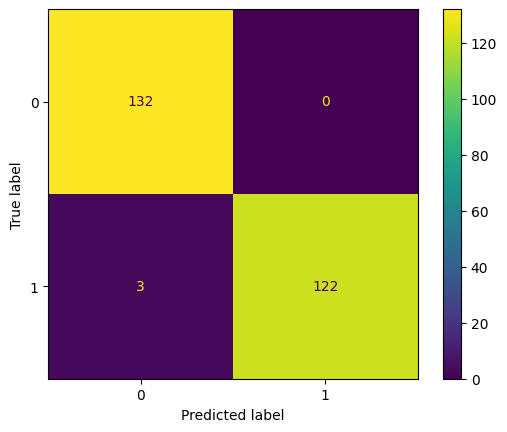

In [20]:
# Confusion matrix Display
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Making a Predictive Syatem

In [27]:
input_data = (46,	1,	0,	120,	249,	0,	0,	144,	0,	0.8,	2,	0,	3) #0
#input_data = (63, 1, 3, 245, 233, 1, 0, 150, 0, 2.3, 0, 0, 1) #1


# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Person does not have a Heart Diesease")
else:
  print("The Person has Heart Disease")

[0]
The Person does not have a Heart Diesease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Saving The Trained Model

In [29]:
import pickle

filename = 'heart_disease_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [31]:
#input_data = (70,	1,	0,	145,	174,	0,	1,	125,	1,	2.6,	0,	0,	3) #0
input_data = (58,	0,	0,	100,	248,	0,	0,	122,	0,	1.0,	1,	0,	2) #1


# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Person does not have a Heart Diesease")
else:
  print("The Person has Heart Disease")

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
